In [1]:
# Pandas is used for data manipulation
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Different matrices to score model performance
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# Read in data and display first 5 rows
features = pd.read_csv('Dataset_after_Bayesian_MXM.csv')
features.head(5)

,MH_05,MH_15A,MH_15C,MH_15D,MH_15F,LM_30,LM_40,BH_35A,BH_35B,BH_35E,BH_40A,BH_40D,BH_40F,AGEGRP,SEX,MARSTATC,PEMPSTC,PFSCDV
0,1,1,1,1,1,5,4,1,3,2,3,3,1,3,1,4,1,0
1,3,4,3,2,4,6,3,4,4,4,3,1,1,4,1,1,4,0
2,3,2,1,2,2,6,4,3,4,4,3,3,3,7,2,3,4,0
3,2,2,1,2,2,5,4,1,4,4,3,1,3,3,1,3,1,0
4,2,1,1,1,1,4,3,1,4,2,3,2,1,3,1,4,1,0


In [3]:
features = features.replace([9], 2)
features["MH_05"].replace({2: 1, 3: 2, 4: 3, 5: 4}, inplace=True)
print('The shape of our features is:', features.shape)

The shape of our features is: (4600, 18)


In [4]:
# Descriptive statistics for each column
features.describe()

,MH_05,MH_15A,MH_15C,MH_15D,MH_15F,LM_30,LM_40,BH_35A,BH_35B,BH_35E,BH_40A,BH_40D,BH_40F,AGEGRP,SEX,MARSTATC,PEMPSTC,PFSCDV
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,1.720435,1.824783,1.712826,1.753261,1.786087,4.754348,3.424130,2.030435,3.446087,3.471957,2.540217,2.212609,1.686522,4.235435,1.540000,2.093913,2.407391,0.266522
std,0.858869,0.888277,0.858003,0.884127,0.873309,1.401581,1.093132,1.113844,1.016993,0.783387,0.781188,0.904444,0.935163,1.653242,0.498452,1.240702,1.425893,0.693718
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,4.000000,1.000000,4.000000,4.000000,3.000000,3.000000,1.000000,4.000000,2.000000,1.000000,2.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,6.000000,2.000000,3.000000,4.000000,0.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000,5.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,7.000000,2.000000,4.000000,4.000000,3.000000


In [5]:
# Use numpy to convert to arrays
import numpy as np

In [6]:
# One Hot Encoding
features = pd.get_dummies(features)

In [7]:
# Labels are the values we want to predict
labels = features['MH_05']
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('MH_05', axis = 1)

In [8]:
# Over-sampling the minority class
from imblearn.over_sampling import SMOTE
features, labels = SMOTE().fit_resample(features, labels)
labels.value_counts().to_frame().T

,1,2,3,4
MH_05,2346,2346,2346,2346


In [9]:
# Saving feature names for later use
feature_list = list(features.columns)

In [10]:
# Convert to numpy array
labels = np.array(labels)
features = np.array(features)

In [11]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7507, 17)
Training Labels Shape: (7507,)
Testing Features Shape: (1877, 17)
Testing Labels Shape: (1877,)


In [12]:
# Import the model we are using
from xgboost import XGBClassifier

In [13]:
# fit model on all training data
xgb = XGBClassifier()
xgb.fit(train_features, train_labels)

[16:31:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [14]:
# make predictions for test data and evaluate
predictions = xgb.predict(test_features)
true_values = test_labels # True values
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.28 degrees.


In [15]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 80.96 %.



Test confusion_matrix


Text(33.0, 0.5, 'True')

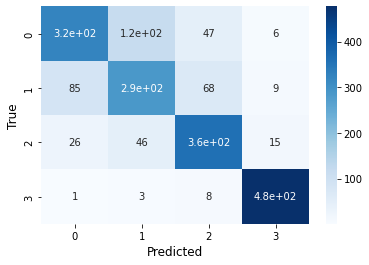

In [16]:
# To evaluate the performance, use confusion matrix
cf_matrix = confusion_matrix(test_labels, predictions)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [17]:
# Get numerical feature importances
importances = list(xgb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: MH_15A               Importance: 0.25
Variable: MH_15D               Importance: 0.10000000149011612
Variable: MH_15C               Importance: 0.05999999865889549
Variable: MH_15F               Importance: 0.05000000074505806
Variable: BH_40D               Importance: 0.05000000074505806
Variable: AGEGRP               Importance: 0.05000000074505806
Variable: LM_30                Importance: 0.03999999910593033
Variable: LM_40                Importance: 0.03999999910593033
Variable: BH_35A               Importance: 0.03999999910593033
Variable: BH_35B               Importance: 0.03999999910593033
Variable: BH_35E               Importance: 0.03999999910593033
Variable: BH_40A               Importance: 0.03999999910593033
Variable: BH_40F               Importance: 0.03999999910593033
Variable: SEX                  Importance: 0.03999999910593033
Variable: MARSTATC             Importance: 0.03999999910593033
Variable: PEMPSTC              Importance: 0.03999999910593033
Variabl

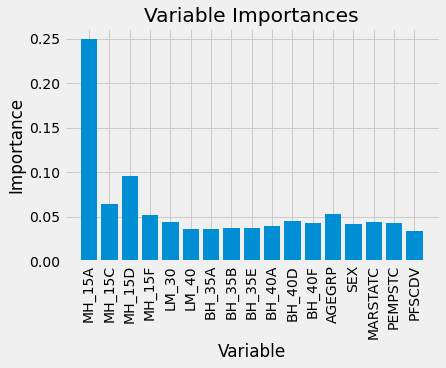

In [18]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [19]:
features_name = ['MH_15A', 'MH_15C', 'MH_15D', 'MH_15F', 'LM_30', 'LM_40', 'BH_35A', 'BH_35B', 'BH_35E', 'BH_40A', 'BH_40D', 'BH_40F', 'AGEGRP', 'SEX', 'MARSTATC', 'PEMPSTC', 'PFSCDV']
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=test_features, columns=features_name)
TestingDataResults['TargetColumn']=test_labels
TestingDataResults['Prediction']=predictions
TestingDataResults.head(20)

,MH_15A,MH_15C,MH_15D,MH_15F,LM_30,LM_40,BH_35A,BH_35B,BH_35E,BH_40A,BH_40D,BH_40F,AGEGRP,SEX,MARSTATC,PEMPSTC,PFSCDV,TargetColumn,Prediction
0,1,1,1,1,6,3,1,1,4,2,3,1,5,2,1,4,0,3,3
1,4,3,4,1,4,4,1,3,2,3,1,1,3,2,1,1,0,4,4
2,2,2,2,3,5,4,4,4,4,2,1,3,3,1,1,1,0,3,2
3,2,2,2,2,6,5,1,4,3,2,3,1,7,1,1,4,0,2,1
4,2,2,2,1,4,4,1,4,4,1,1,1,4,2,3,1,0,3,3
5,2,2,2,2,4,4,1,4,4,3,1,1,5,1,1,1,0,3,3
6,2,2,1,2,6,3,1,3,4,2,1,1,3,2,4,4,0,1,3
7,2,2,1,1,6,2,1,1,4,3,3,1,6,2,1,4,0,1,1
8,4,4,3,2,1,4,3,4,4,3,1,1,2,1,4,1,0,4,4
9,2,2,2,2,5,4,3,3,4,3,1,1,4,1,1,1,0,3,3
